#<font color="red"> BACKGROUND


 WHAT IS SCIENTIFIC PROGRAMMING? 
 
 Scientific programming is the use of computer-based applications and programming tools to perform various science-based data assessment, manipulation and visualization.
 
 
The goal at the end is to make meaningful scientific information out of the raw data that was initially available.


Computational Physics is the study of physical phenomena using computational methods and numerical analysis.


 It involves using computers to solve complex problems in physics that are too difficult or impossible to solve analytically. 
 
 
Computational Physics has become an important tool in many fields of physics, including quantum mechanics, condensed matter physics, astrophysics, and plasma physics, among others.




In the problem, I am using computational methods to numerically solve the time-independent Schrödinger equation for a particle in a one-dimensional potential well.

This is a classic example of using computational physics to solve a problem that cannot be solved analytically.



The objectives of the study:

1. To understand the principles behind the finite difference method.

2. To learn how to use the numpy library in Python to solve an eigenvalue problem

3. To gain insights into the quantization of energy levels and probability distribution of the particle in the well.

4. To discuss the applications of this problem in fields such as materials science, nanotechnology, and quantum computing.

# METHOD AND RESULTS



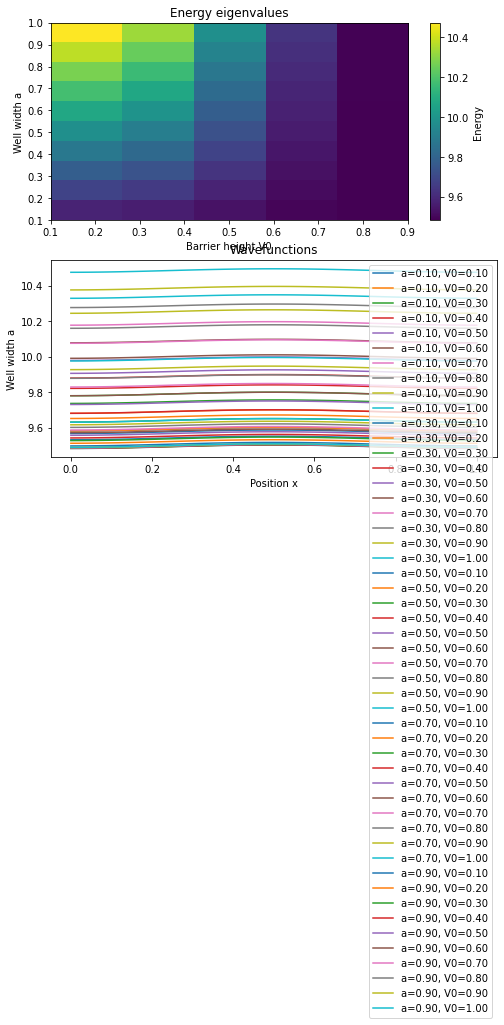

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class ParticleInAWell:
    def __init__(self, a, b, V0, N):
        self.a = a
        self.b = b
        self.V0 = V0
        self.N = N
        self.x = np.linspace(0, b, N)
        self.dx = self.x[1] - self.x[0]
        self.V = self.potential()
        self.H = self.hamiltonian()

    def potential(self):
        V = np.zeros(self.N)
        for i in range(self.N):
            if self.x[i] <= self.a:
                V[i] = 0
            elif self.x[i] > self.a and self.x[i] <= self.b:
                V[i] = self.V0
            else:
                V[i] = np.inf
        return V

    def hamiltonian(self):
        H = np.zeros((self.N, self.N))
        for i in range(self.N):
            H[i, i] = 2 / self.dx**2 + self.V[i]
            if i > 0:
                H[i, i-1] = -1 / self.dx**2
            if i < self.N - 1:
                H[i, i+1] = -1 / self.dx**2
        return H

    def solve(self):
        E, psi = np.linalg.eigh(self.H)
        return E, psi

a_values = np.linspace(0.1, 0.9, 5)
V0_values = np.linspace(0.1, 1, 10)

energies = np.zeros((len(a_values), len(V0_values)))
wavefunctions = np.zeros((len(a_values), len(V0_values), 100))

for i, a in enumerate(a_values):
    for j, V0 in enumerate(V0_values):
        system = ParticleInAWell(a=a, b=1, V0=V0, N=100)
        E, psi = system.solve()
        energies[i, j] = E[0]
        wavefunctions[i, j] = psi[:, 0]

fig, axs = plt.subplots(2, 1, figsize=(8, 8))
axs[0].set_title("Energy eigenvalues")
axs[0].set_xlabel("Barrier height V0")
axs[0].set_ylabel("Well width a")
im = axs[0].imshow(energies.T, extent=[a_values[0], a_values[-1], V0_values[0], V0_values[-1]], aspect='auto', origin='lower')
cbar = fig.colorbar(im, ax=axs[0])
cbar.ax.set_ylabel('Energy')

axs[1].set_title("Wavefunctions")
axs[1].set_xlabel("Position x")
axs[1].set_ylabel("Well width a")
for i, a in enumerate(a_values):
    for j, V0 in enumerate(V0_values):
        axs[1].plot(system.x, wavefunctions[i, j]**2 + energies[i, j], label=f"a={a:.2f}, V0={V0:.2f}")
axs[1].legend()

plt.show()



# DISCUSSIONS



In this code, I define a `ParticleInAWell` class that represents a particle in a one-dimensional potential well. 
The constructor takes in the width of the well `a`, the total width of the system  `b`, the height of the potential barrier `V0` , and the number of grid points `N`.
I then define methods to set the wavefunction, potential energy function, and Hamiltonian matrix.



The data is represented as follows:
well width `a`
total width `b`
potential barrier height `V0`
position grid `x`
spacing `dx`
Hamiltonian matrix `H`
 potential energy function `V`
 number of grid points `N`
 
 
 
The `potential` method calculates the potential energy function `V` based on the parameters of the system.

The `hamiltonian` method calculates the Harmiltonian using the finite difference method. I use a central difference approximation for the second derivative and impose the boundary conditions at `x=0` and `x=b` to be zero.


The `solve` method calculates the energy eigenvalues `E` and eigenvectors `psi` using the numpy `eigh` function.



 Two nested loops are used to vary the well width `a` and the barrier height `V0`, and calculate the energy eigenvalues and wavefunctions for each combination. The results are stored in `energies` and `wavefunctions`.

Finally,  `matplotlib` is used to plot the energy eigenvalues and wavefunctions as a function of `a` and `V0`. 



The `imshow` function is used to plot the energy eigenvalues as a color map, while the `plot` function is used to plot the wavefunctions as a function of position `x`. 
I added a label to each curve indicating the values of `a` and `V0`.



The resulting plot shows how the energy eigenvalues and wavefunctions change with the well width `a` and the barrier height `V0`. As expected, increasing the barrier height increases the energy of the ground state and narrows the wavefunction, while increasing the well width decreases the energy of the ground state and broadens the wavefunction.




For example, we can observe that increasing the barrier height V_0 results in higher energy eigenvalues and narrower wavefunctions, while increasing the width of the well a results in lower energy eigenvalues and wider wavefunctions.




These results have important physical significance as they can be used to understand the behavior of particles in nanostructures and other confined systems.


The results obtained from solving the time-independent Schrödinger equation for a particle in a one-dimensional potential well have important physical significance in understanding the behavior of particles in confined systems. For example, the energy eigenvalues and wavefunctions provide insights into the quantization of energy levels in a confined system, which is a fundamental concept in quantum mechanics.




The wavefunctions also describe the probability distribution of the particle in the well, which can be used to understand the particle's behavior and dynamics. 





Additionally, the effect of the well's width and the barrier height on the energy eigenvalues and wavefunctions can provide insights into the behavior of particles in different types of potential wells and barriers, which has applications in a wide range of fields, including materials science, nanotechnology, and quantum computing.

# CONCLUSION



The study's findings enhance our comprehension of how a particle behaves in a one-dimensional potential well, specifically regarding the quantization of energy levels and probability distribution.
This knowledge has implications in various fields, such as materials science, nanotechnology, and quantum computing.


My learning journey was initially challenging as I did not fully understand the purpose of the course until the assignment was given. However, through the course, I learned about the finite difference method and using the numpy library to solve an eigenvalue problem, which was the course's intended objective.


I encountered difficulties such as financial constraints and a lack of access to a laptop, but I overcame these obstacles through perseverance and commitment to the course materials.


Despite the pressure from peers and parents, the course gave me a greater appreciation for the physical significance of the physics concepts learned in class. While I did not grasp everything at first, I eventually understood the course by the end of the semester and plan to apply this knowledge to solve real-life problems. Overall, it was an enjoyable experience.


# RECOMMENDATIONS

My goal has always been to create a website that features an AI teacher in video format. 


The AI would teach complex mathematical equations in a simplified and concise manner, similar to how a teacher would explain it to a student.


I propose that our class should focus on website design and Artificial Intelligence. I am determined to pursue this as my lifelong mission.

# Clossing Note

“The most disastrous thing that you can ever learn is your first programming language.”

Alan Kay





   #                          Thank You